# Random Forests

- use scikit-learn for **random forests**
- do **ordinal encoding** with high-cardinality categoricals
- understand how categorical encodings affect trees differently compared to linear models
- understand how tree ensembles reduce overfitting compared to a single decision tree with unlimited depth

In [1]:
#%%capture

#import sys

# If you're on Colab:
#if 'google.colab' in sys.modules:
#    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
#    !pip install category_encoders==2.*

# If you're working locally:
#else:
#    DATA_PATH = '../data/'

In [2]:
#Y = mx + b
#Y = M1X1 M2X2 + b
#Y = M1X1 M2X2 + M3X1X2 + b
#Y = M1X1^2 M2X2 + M3X1X2 + b

In [5]:
!pip install category_encoders==2.*
#!pip install pandas_profiling==2.*

In [18]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import os


In [26]:
#Set home directory to the home directory of current user
home_dir = Path.home()

# set 'main_dir' to the Unit 2 folder
main_dir = home_dir / "Desktop" / "Unit 2"

data_dir = main_dir / "data"

plot_dir = main_dir / "plots"

outputs = main_dir / "outputs"


In [35]:
#Change working directory
os.chdir(data_dir)

#Check working directory
os.getcwd()

'C:\\Users\\VIgnesh\\Desktop\\Unit 2\\data'

# I. Wrangle Data

In [37]:
# columns that had 0s that should be NaNs
# Treat all zeros in the dataset as NaNs
def wrangle(temp_df):

  # Set row index to 'id' column 
  temp_df.set_index('id', inplace=True)

  # Drop the constant column "recorded_by"
  temp_df.drop(columns='recorded_by', inplace=True)

  # Drop Duplicate Column "quantity_group"
  temp_df.drop(columns='quantity_group', inplace=True)

  # Drop High-Cardinality Columns
  cols_to_drop = [col for col in df.select_dtypes('object') if df[col].nunique() > 100]
  temp_df.drop(columns=cols_to_drop, inplace=True)

  # Drop columns with a high proportion of null values
  temp_df.drop(columns='num_private', inplace=True)
  
  return temp_df

df = pd.merge(pd.read_csv('train_features.csv', na_values=[0]), 
              pd.read_csv('train_labels.csv', na_values=[0]))

train = wrangle(df)
X_test = wrangle(pd.read_csv('test_features.csv'))

# II. Split Data

## Split Target Vector from feature matrix

In [27]:
target = 'status_group'

y = train[target]

X = train.drop(columns = target)

# Training-Validation Split

- Randomized split

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 5)

# III. Establish Baseline

This is a **classification** problem, our baseline will be **accuracy**. 
Because it's a classification, we need to calculate baseline accuracy based on our majority. 

In [29]:
print('Baseline Accuracy:', y_train.value_counts(normalize = True).max()*100)

Baseline Accuracy: 54.38762626262626


# IV. Build Model(s)

- Imputer Missing values
- Encode for Categorical values

**First Model:** Logistic Regression

In [16]:
model_lr = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(max_iter = 200)
)

model_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type...
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, du

**First Model:** Decision Tree Classifier

In [17]:
model_dt = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeClassifier()
)

model_dt.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                       

**First Model:** Random Forest Classifier

In [30]:
model_rf = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier()
)

model_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                 

# V. Check Metrics

In [24]:
#Logistic Regression Accuracy
print('Logistic Regression Accuracy')
print('Training Accuracy:', model_lr.score(X_train, y_train))
print('Validation Accuracy:', model_lr.score(X_val, y_val))
print('----------------------------------------------------------------------')

#Decision Tree Accuracy
print('Decision Tree Accuracy')
print('Training Accuracy:', model_dt.score(X_train, y_train))
print('Validation Accuracy:', model_dt.score(X_val, y_val))
print('----------------------------------------------------------------------')

#Random Forest Accuracy
print('Random Forest Accuracy')
print('Training Accuracy:', model_rf.score(X_train, y_train))
print('Validation Accuracy:', model_rf.score(X_val, y_val))

Logistic Regression Accuracy
Training Accuracy: 0.65625
Validation Accuracy: 0.6599326599326599
----------------------------------------------------------------------
Decision Tree Accuracy
Training Accuracy: 0.9955281986531986
Validation Accuracy: 0.7496843434343434
----------------------------------------------------------------------
Random Forest Accuracy
Training Accuracy: 0.9954229797979798
Validation Accuracy: 0.8013468013468014


# VI. Tune Model

In [30]:
max_depths = range(2,40, 2)

list(max_depths)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

In [31]:
val_acc = []
train_acc = []

for depth in max_depths:
  model_rf = make_pipeline(
      OrdinalEncoder(), 
      SimpleImputer(), 
      RandomForestClassifier(max_depth = depth)
  )

  model_rf.fit(X_train, y_train)
  train_acc.append(model_rf.score(X_train, y_train))
  val_acc.append(model_rf.score(X_val, y_val))




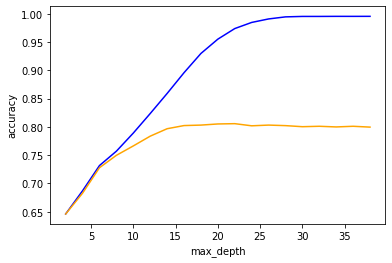

In [33]:
#Validation curves

plt.plot(max_depths, train_acc, color = 'blue', label = 'training')
plt.plot(max_depths, val_acc, color = 'orange', label = 'validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [47]:
#Retrain RF with optimal Hyperparameters

model_rf = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(max_depth = 20)
)

model_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='auto',
                                   

# VII. Communicate Results

Gini Importance


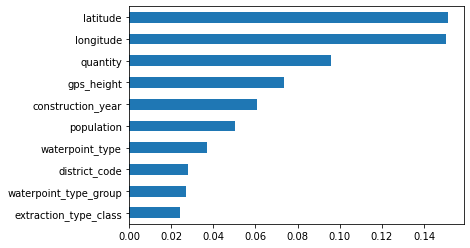

In [41]:
features = model_rf.named_steps['ordinalencoder'].get_feature_names()
gini = model_rf.named_steps['randomforestclassifier'].feature_importances_

pd.Series(data = gini, index = features).sort_values(key = abs).tail(10).plot(kind = 'barh')


## Submit to Kaggle

In [31]:
#Change working directory
os.chdir(outputs)

predictions = pd.DataFrame(data=model_rf.predict(X_test), index=X_test.index)

predictions.columns = ['status_group']

predictions.insert(0, 'id', predictions.index)

predictions = predictions.reset_index(drop=True)


In [33]:
# generate CSV
predictions.to_csv('sample_submission_Vignesh_rf.csv', index=False)